# TWITTER SENTIMENT ANALYSIS

## Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

In [1]:
#installing important libraries in the system
!pip install nltk
!pip install wordcloud
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anirudh Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Anirudh
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nlt

Finished.


## Twitter data contains a bunch of information parameters. Sometimes, the data contain unnecessary things that need to be cleaned, such as unnecessary characters, links, newlines, and other kinds of stuff.

## Firstly, you need to import the modules needed. We’re going to use 4 modules here:

### Pandas, to open data files and to apply certain operations to the data.

### Html, to decode HTML entities into regular characters.

### Re, to filter and delete unnecessary links, hash, username, punctuations or whatever you wish.

### Nltk, to clean stopwords.

In [2]:
#importing required libraries
import pandas as pd 
import numpy as np
import html
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [4]:
# reading csv file
 
data = pd.read_csv("F:/Technocolabs intern/final datasets(scraping)/NVDA.csv")
data

,Datetime,Text
0,2021-09-21 18:07:35+00:00,#StockNews #NVDA Are You looking For Hot Stock...
1,2021-09-21 14:42:45+00:00,-$61 in 60 minutes | Small Account Trade Log \...
2,2021-09-21 12:25:19+00:00,Women did not get the vote by voting. They too...
3,2021-09-21 03:41:38+00:00,Who is buying the dip? Sold #SPY and #NVDA pu...
4,2021-09-21 02:59:32+00:00,$ES_F Daily\n\nDipped below the channel\n&amp;...
...,...,...
6478,2020-01-02 16:45:53+00:00,BLOCK TRADE detected in #NVDA
6479,2020-01-02 16:31:48+00:00,Last tuesday we entered $Nvda $Nivida #Nvda #N...
6480,2020-01-02 15:59:24+00:00,One week till I’m back in rehearsals with @Asa...
6481,2020-01-02 11:35:44+00:00,#Robinhood! Don't let 2020 Pass You Up! One St...


In [5]:
data.shape

(6483, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6483 entries, 0 to 6482
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  6483 non-null   object
 1   Text      6189 non-null   object
dtypes: object(2)
memory usage: 101.4+ KB


In [7]:
# deleting null values
data = data.dropna()
data

,Datetime,Text
0,2021-09-21 18:07:35+00:00,#StockNews #NVDA Are You looking For Hot Stock...
1,2021-09-21 14:42:45+00:00,-$61 in 60 minutes | Small Account Trade Log \...
2,2021-09-21 12:25:19+00:00,Women did not get the vote by voting. They too...
3,2021-09-21 03:41:38+00:00,Who is buying the dip? Sold #SPY and #NVDA pu...
4,2021-09-21 02:59:32+00:00,$ES_F Daily\n\nDipped below the channel\n&amp;...
...,...,...
6478,2020-01-02 16:45:53+00:00,BLOCK TRADE detected in #NVDA
6479,2020-01-02 16:31:48+00:00,Last tuesday we entered $Nvda $Nivida #Nvda #N...
6480,2020-01-02 15:59:24+00:00,One week till I’m back in rehearsals with @Asa...
6481,2020-01-02 11:35:44+00:00,#Robinhood! Don't let 2020 Pass You Up! One St...


In [8]:
# cleaning unnecessary text from data
data.Text = data.Text.str.lower() #convert text to lower case
data.Text = data.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
data.Text = data.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
data.Text = data.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
data.Text = data.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
data

C:\Users\Anirudh Saxena\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Datetime,Text
0,2021-09-21 18:07:35+00:00,stocknews nvda are you looking for hot stock n...
1,2021-09-21 14:42:45+00:00,61 in 60 minutes small account trade log \nwh...
2,2021-09-21 12:25:19+00:00,women did not get the vote by voting they took...
3,2021-09-21 03:41:38+00:00,who is buying the dip sold spy and nvda put s...
4,2021-09-21 02:59:32+00:00,es_f daily\n\ndipped below the channel\n\nboll...
...,...,...
6478,2020-01-02 16:45:53+00:00,block trade detected in nvda
6479,2020-01-02 16:31:48+00:00,last tuesday we entered nvda nivida nvda nivid...
6480,2020-01-02 15:59:24+00:00,one week till im back in rehearsals with look...
6481,2020-01-02 11:35:44+00:00,robinhood dont let 2020 pass you up one stock ...


In [9]:
#sorting the data datewise
data1 = data.sort_values(['Datetime'])
data1.head()

,Datetime,Text
6482,2020-01-01 19:46:33+00:00,happynewyear as we reflect on 2019 here is our...
6481,2020-01-02 11:35:44+00:00,robinhood dont let 2020 pass you up one stock ...
6480,2020-01-02 15:59:24+00:00,one week till im back in rehearsals with look...
6479,2020-01-02 16:31:48+00:00,last tuesday we entered nvda nivida nvda nivid...
6478,2020-01-02 16:45:53+00:00,block trade detected in nvda


# DATA VISUALISATION

In [10]:
import textblob as TextBlob

# Using Wordcloud

## Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

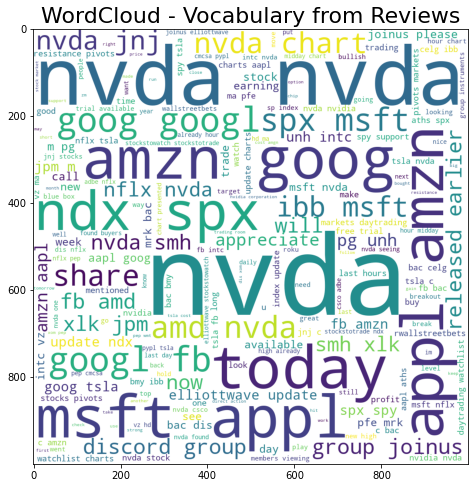

In [11]:
from wordcloud import WordCloud
allwords= ' '.join(twts for twts in data1['Text'] )
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(allwords)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

# Analysing Polarity and Subjectivity 

## The sentiment function of textblob returns two properties, polarity, and subjectivity.Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. The sentiment function of textblob returns two properties, polarity, and subjectivity.Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [12]:
from textblob import TextBlob

In [13]:
def getSubjectivity(data1):
    return TextBlob(data1).sentiment.subjectivity
def getPolarity(data1):
    return TextBlob(data1).sentiment.polarity

data1['Subjectivity'] = data1['Text'].apply(getSubjectivity)
data1['Polarity'] = data1['Text'].apply(getPolarity)
data1

,Datetime,Text,Subjectivity,Polarity
6482,2020-01-01 19:46:33+00:00,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667
6481,2020-01-02 11:35:44+00:00,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000
6480,2020-01-02 15:59:24+00:00,one week till im back in rehearsals with look...,0.400000,0.150000
6479,2020-01-02 16:31:48+00:00,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000
6478,2020-01-02 16:45:53+00:00,block trade detected in nvda,0.000000,0.000000
...,...,...,...,...
4,2021-09-21 02:59:32+00:00,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190
3,2021-09-21 03:41:38+00:00,who is buying the dip sold spy and nvda put s...,0.500000,0.200000
2,2021-09-21 12:25:19+00:00,women did not get the vote by voting they took...,0.150000,-0.100000
1,2021-09-21 14:42:45+00:00,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857


# Analysing the tweets 

In [14]:
def getAnalysis(score):
    if score < 0:
        return 'Negitive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data1['Analysis'] = data1['Polarity'].apply(getAnalysis)
data1



,Datetime,Text,Subjectivity,Polarity,Analysis
6482,2020-01-01 19:46:33+00:00,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,Positive
6481,2020-01-02 11:35:44+00:00,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,Positive
6480,2020-01-02 15:59:24+00:00,one week till im back in rehearsals with look...,0.400000,0.150000,Positive
6479,2020-01-02 16:31:48+00:00,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,Neutral
6478,2020-01-02 16:45:53+00:00,block trade detected in nvda,0.000000,0.000000,Neutral
...,...,...,...,...,...
4,2021-09-21 02:59:32+00:00,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,Negitive
3,2021-09-21 03:41:38+00:00,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,Positive
2,2021-09-21 12:25:19+00:00,women did not get the vote by voting they took...,0.150000,-0.100000,Negitive
1,2021-09-21 14:42:45+00:00,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,Positive


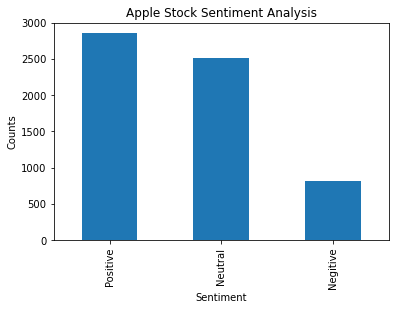

In [15]:
data1['Analysis'].value_counts()

plt.title('Apple Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# MANIPULATING THE DATE AND TIME COLUMN

In [16]:
data1['Datetime'] = data1['Datetime'].apply(lambda x:x[:19])

In [17]:
a = list(data1["Datetime"].apply(lambda x:len(x)>4))

In [18]:
data1["Date"] = pd.to_datetime(data1["Datetime"],errors="coerce")

In [19]:
data1

,Datetime,Text,Subjectivity,Polarity,Analysis,Date
6482,2020-01-01 19:46:33,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,Positive,2020-01-01 19:46:33
6481,2020-01-02 11:35:44,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,Positive,2020-01-02 11:35:44
6480,2020-01-02 15:59:24,one week till im back in rehearsals with look...,0.400000,0.150000,Positive,2020-01-02 15:59:24
6479,2020-01-02 16:31:48,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,Neutral,2020-01-02 16:31:48
6478,2020-01-02 16:45:53,block trade detected in nvda,0.000000,0.000000,Neutral,2020-01-02 16:45:53
...,...,...,...,...,...,...
4,2021-09-21 02:59:32,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,Negitive,2021-09-21 02:59:32
3,2021-09-21 03:41:38,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,Positive,2021-09-21 03:41:38
2,2021-09-21 12:25:19,women did not get the vote by voting they took...,0.150000,-0.100000,Negitive,2021-09-21 12:25:19
1,2021-09-21 14:42:45,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,Positive,2021-09-21 14:42:45


In [20]:
data2 = pd.get_dummies(data1['Analysis'])
data2

,Negitive,Neutral,Positive
6482,0,0,1
6481,0,0,1
6480,0,0,1
6479,0,1,0
6478,0,1,0
...,...,...,...
4,1,0,0
3,0,0,1
2,1,0,0
1,0,0,1


In [21]:
data1

,Datetime,Text,Subjectivity,Polarity,Analysis,Date
6482,2020-01-01 19:46:33,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,Positive,2020-01-01 19:46:33
6481,2020-01-02 11:35:44,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,Positive,2020-01-02 11:35:44
6480,2020-01-02 15:59:24,one week till im back in rehearsals with look...,0.400000,0.150000,Positive,2020-01-02 15:59:24
6479,2020-01-02 16:31:48,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,Neutral,2020-01-02 16:31:48
6478,2020-01-02 16:45:53,block trade detected in nvda,0.000000,0.000000,Neutral,2020-01-02 16:45:53
...,...,...,...,...,...,...
4,2021-09-21 02:59:32,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,Negitive,2021-09-21 02:59:32
3,2021-09-21 03:41:38,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,Positive,2021-09-21 03:41:38
2,2021-09-21 12:25:19,women did not get the vote by voting they took...,0.150000,-0.100000,Negitive,2021-09-21 12:25:19
1,2021-09-21 14:42:45,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,Positive,2021-09-21 14:42:45


In [22]:
data3 = pd.concat([data1,data2],axis=1)
data3

,Datetime,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive
6482,2020-01-01 19:46:33,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,Positive,2020-01-01 19:46:33,0,0,1
6481,2020-01-02 11:35:44,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,Positive,2020-01-02 11:35:44,0,0,1
6480,2020-01-02 15:59:24,one week till im back in rehearsals with look...,0.400000,0.150000,Positive,2020-01-02 15:59:24,0,0,1
6479,2020-01-02 16:31:48,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,Neutral,2020-01-02 16:31:48,0,1,0
6478,2020-01-02 16:45:53,block trade detected in nvda,0.000000,0.000000,Neutral,2020-01-02 16:45:53,0,1,0
...,...,...,...,...,...,...,...,...,...
4,2021-09-21 02:59:32,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,Negitive,2021-09-21 02:59:32,1,0,0
3,2021-09-21 03:41:38,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,Positive,2021-09-21 03:41:38,0,0,1
2,2021-09-21 12:25:19,women did not get the vote by voting they took...,0.150000,-0.100000,Negitive,2021-09-21 12:25:19,1,0,0
1,2021-09-21 14:42:45,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,Positive,2021-09-21 14:42:45,0,0,1


In [23]:
data3 = data3.drop(['Datetime'],axis=1)
data3.head()

,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive
6482,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,Positive,2020-01-01 19:46:33,0,0,1
6481,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,Positive,2020-01-02 11:35:44,0,0,1
6480,one week till im back in rehearsals with look...,0.400000,0.150000,Positive,2020-01-02 15:59:24,0,0,1
6479,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,Neutral,2020-01-02 16:31:48,0,1,0
6478,block trade detected in nvda,0.000000,0.000000,Neutral,2020-01-02 16:45:53,0,1,0


In [24]:
data3['Year'] = data3['Date'].dt.year
data3['Month'] = data3['Date'].dt.month
data3['Day'] = data3['Date'].dt.day
data3


,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive,Year,Month,Day
6482,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,Positive,2020-01-01 19:46:33,0,0,1,2020,1,1
6481,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,Positive,2020-01-02 11:35:44,0,0,1,2020,1,2
6480,one week till im back in rehearsals with look...,0.400000,0.150000,Positive,2020-01-02 15:59:24,0,0,1,2020,1,2
6479,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,Neutral,2020-01-02 16:31:48,0,1,0,2020,1,2
6478,block trade detected in nvda,0.000000,0.000000,Neutral,2020-01-02 16:45:53,0,1,0,2020,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,Negitive,2021-09-21 02:59:32,1,0,0,2021,9,21
3,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,Positive,2021-09-21 03:41:38,0,0,1,2021,9,21
2,women did not get the vote by voting they took...,0.150000,-0.100000,Negitive,2021-09-21 12:25:19,1,0,0,2021,9,21
1,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,Positive,2021-09-21 14:42:45,0,0,1,2021,9,21


In [25]:
data3.insert(3, 'StockName', 'NVDIA')
data3

,Text,Subjectivity,Polarity,StockName,Analysis,Date,Negitive,Neutral,Positive,Year,Month,Day
6482,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,NVDIA,Positive,2020-01-01 19:46:33,0,0,1,2020,1,1
6481,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,NVDIA,Positive,2020-01-02 11:35:44,0,0,1,2020,1,2
6480,one week till im back in rehearsals with look...,0.400000,0.150000,NVDIA,Positive,2020-01-02 15:59:24,0,0,1,2020,1,2
6479,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,NVDIA,Neutral,2020-01-02 16:31:48,0,1,0,2020,1,2
6478,block trade detected in nvda,0.000000,0.000000,NVDIA,Neutral,2020-01-02 16:45:53,0,1,0,2020,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,NVDIA,Negitive,2021-09-21 02:59:32,1,0,0,2021,9,21
3,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,NVDIA,Positive,2021-09-21 03:41:38,0,0,1,2021,9,21
2,women did not get the vote by voting they took...,0.150000,-0.100000,NVDIA,Negitive,2021-09-21 12:25:19,1,0,0,2021,9,21
1,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,NVDIA,Positive,2021-09-21 14:42:45,0,0,1,2021,9,21


In [26]:
data30=data3.drop(['Date','Analysis'],axis=1)
data30

,Text,Subjectivity,Polarity,StockName,Negitive,Neutral,Positive,Year,Month,Day
6482,happynewyear as we reflect on 2019 here is our...,0.650000,0.416667,NVDIA,0,0,1,2020,1,1
6481,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,NVDIA,0,0,1,2020,1,2
6480,one week till im back in rehearsals with look...,0.400000,0.150000,NVDIA,0,0,1,2020,1,2
6479,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,NVDIA,0,1,0,2020,1,2
6478,block trade detected in nvda,0.000000,0.000000,NVDIA,0,1,0,2020,1,2
...,...,...,...,...,...,...,...,...,...,...
4,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,NVDIA,1,0,0,2021,9,21
3,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,NVDIA,0,0,1,2021,9,21
2,women did not get the vote by voting they took...,0.150000,-0.100000,NVDIA,1,0,0,2021,9,21
1,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,NVDIA,0,0,1,2021,9,21


In [27]:
data4 = data3.drop(['Text', 'Subjectivity', 'Polarity','Analysis'], axis = 1)
data4

,StockName,Date,Negitive,Neutral,Positive,Year,Month,Day
6482,NVDIA,2020-01-01 19:46:33,0,0,1,2020,1,1
6481,NVDIA,2020-01-02 11:35:44,0,0,1,2020,1,2
6480,NVDIA,2020-01-02 15:59:24,0,0,1,2020,1,2
6479,NVDIA,2020-01-02 16:31:48,0,1,0,2020,1,2
6478,NVDIA,2020-01-02 16:45:53,0,1,0,2020,1,2
...,...,...,...,...,...,...,...,...
4,NVDIA,2021-09-21 02:59:32,1,0,0,2021,9,21
3,NVDIA,2021-09-21 03:41:38,0,0,1,2021,9,21
2,NVDIA,2021-09-21 12:25:19,1,0,0,2021,9,21
1,NVDIA,2021-09-21 14:42:45,0,0,1,2021,9,21


In [28]:
data5 = data4.drop(['Year','Month','Day'], axis = 1)
data5

,StockName,Date,Negitive,Neutral,Positive
6482,NVDIA,2020-01-01 19:46:33,0,0,1
6481,NVDIA,2020-01-02 11:35:44,0,0,1
6480,NVDIA,2020-01-02 15:59:24,0,0,1
6479,NVDIA,2020-01-02 16:31:48,0,1,0
6478,NVDIA,2020-01-02 16:45:53,0,1,0
...,...,...,...,...,...
4,NVDIA,2021-09-21 02:59:32,1,0,0
3,NVDIA,2021-09-21 03:41:38,0,0,1
2,NVDIA,2021-09-21 12:25:19,1,0,0
1,NVDIA,2021-09-21 14:42:45,0,0,1


In [29]:
data6 = data5.groupby([data4['Date'].dt.date]).sum()
data6

,Negitive,Neutral,Positive
Date,,,
2020-01-01,0,0,1
2020-01-02,0,2,2
2020-01-03,0,1,2
2020-01-04,1,1,0
2020-01-05,0,0,3
...,...,...,...
2021-09-17,1,2,0
2021-09-18,0,1,3
2021-09-19,0,3,0


In [30]:
data6.head()

,Negitive,Neutral,Positive
Date,,,
2020-01-01,0,0,1
2020-01-02,0,2,2
2020-01-03,0,1,2
2020-01-04,1,1,0
2020-01-05,0,0,3


In [31]:
data6['Total Tweets'] = data6['Positive']+  data6['Negitive']+  data6['Neutral']
data6 

,Negitive,Neutral,Positive,Total Tweets
Date,,,,
2020-01-01,0,0,1,1
2020-01-02,0,2,2,4
2020-01-03,0,1,2,3
2020-01-04,1,1,0,2
2020-01-05,0,0,3,3
...,...,...,...,...
2021-09-17,1,2,0,3
2021-09-18,0,1,3,4
2021-09-19,0,3,0,3


In [32]:
data7 = data6.reset_index()
data7

,Date,Negitive,Neutral,Positive,Total Tweets
0,2020-01-01,0,0,1,1
1,2020-01-02,0,2,2,4
2,2020-01-03,0,1,2,3
3,2020-01-04,1,1,0,2
4,2020-01-05,0,0,3,3
...,...,...,...,...,...
622,2021-09-17,1,2,0,3
623,2021-09-18,0,1,3,4
624,2021-09-19,0,3,0,3
625,2021-09-20,4,3,3,10


In [33]:
data8 = data7[['Date','Positive','Neutral' , 'Negitive','Total Tweets']]
data8

,Date,Positive,Neutral,Negitive,Total Tweets
0,2020-01-01,1,0,0,1
1,2020-01-02,2,2,0,4
2,2020-01-03,2,1,0,3
3,2020-01-04,0,1,1,2
4,2020-01-05,3,0,0,3
...,...,...,...,...,...
622,2021-09-17,0,2,1,3
623,2021-09-18,3,1,0,4
624,2021-09-19,0,3,0,3
625,2021-09-20,3,3,4,10


In [34]:
data8['Date']=pd.to_datetime(data8.Date, format='%Y/%m/%d')
data8['Year'] = data8['Date'].dt.year
data8['Month'] = data8['Date'].dt.month
data8['Day'] = data8['Date'].dt.day
data8

,Date,Positive,Neutral,Negitive,Total Tweets,Year,Month,Day
0,2020-01-01,1,0,0,1,2020,1,1
1,2020-01-02,2,2,0,4,2020,1,2
2,2020-01-03,2,1,0,3,2020,1,3
3,2020-01-04,0,1,1,2,2020,1,4
4,2020-01-05,3,0,0,3,2020,1,5
...,...,...,...,...,...,...,...,...
622,2021-09-17,0,2,1,3,2021,9,17
623,2021-09-18,3,1,0,4,2021,9,18
624,2021-09-19,0,3,0,3,2021,9,19
625,2021-09-20,3,3,4,10,2021,9,20


In [35]:
data9 = data8.drop(['Date'],axis=1)
data9

,Positive,Neutral,Negitive,Total Tweets,Year,Month,Day
0,1,0,0,1,2020,1,1
1,2,2,0,4,2020,1,2
2,2,1,0,3,2020,1,3
3,0,1,1,2,2020,1,4
4,3,0,0,3,2020,1,5
...,...,...,...,...,...,...,...
622,0,2,1,3,2021,9,17
623,3,1,0,4,2021,9,18
624,0,3,0,3,2021,9,19
625,3,3,4,10,2021,9,20


In [36]:
data10 = data9[['Year', 'Month', 'Day', 'Positive','Negitive','Neutral','Total Tweets']]
data10

,Year,Month,Day,Positive,Negitive,Neutral,Total Tweets
0,2020,1,1,1,0,0,1
1,2020,1,2,2,0,2,4
2,2020,1,3,2,0,1,3
3,2020,1,4,0,1,1,2
4,2020,1,5,3,0,0,3
...,...,...,...,...,...,...,...
622,2021,9,17,0,1,2,3
623,2021,9,18,3,0,1,4
624,2021,9,19,0,0,3,3
625,2021,9,20,3,4,3,10


In [38]:
data10.insert(3,'StockName','NVDIA')
data10

,Year,Month,Day,StockName,Positive,Negitive,Neutral,Total Tweets
0,2020,1,1,NVDIA,1,0,0,1
1,2020,1,2,NVDIA,2,0,2,4
2,2020,1,3,NVDIA,2,0,1,3
3,2020,1,4,NVDIA,0,1,1,2
4,2020,1,5,NVDIA,3,0,0,3
...,...,...,...,...,...,...,...,...
622,2021,9,17,NVDIA,0,1,2,3
623,2021,9,18,NVDIA,3,0,1,4
624,2021,9,19,NVDIA,0,0,3,3
625,2021,9,20,NVDIA,3,4,3,10


In [40]:
import seaborn as sns

<AxesSubplot:title={'center':'Postive Negitive and Neutral tweets for NVDIA'}, ylabel='Positive'>

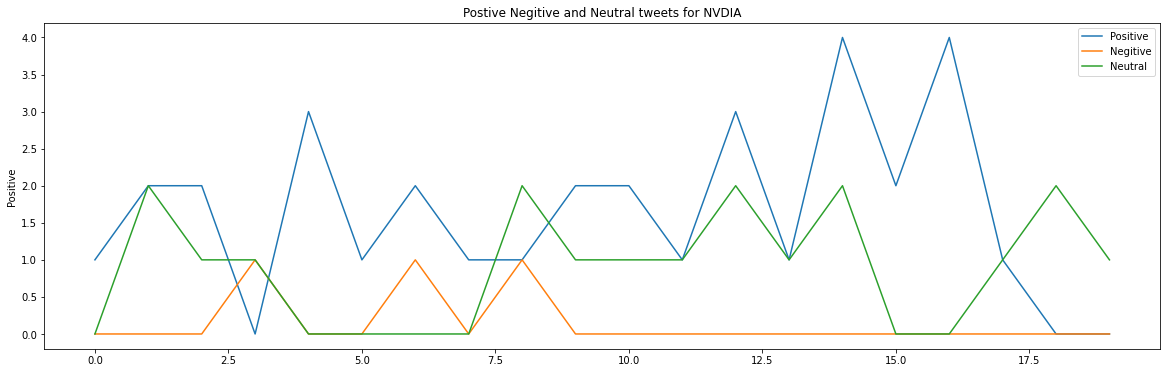

In [46]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Postive Negitive and Neutral tweets for NVDIA")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=data10.head(20)['Positive'], label="Positive")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=data10.head(20)['Negitive'], label="Negitive")

sns.lineplot(data=data10.head(20)['Neutral'], label="Neutral")



Text(0.5, 0, 'Month')

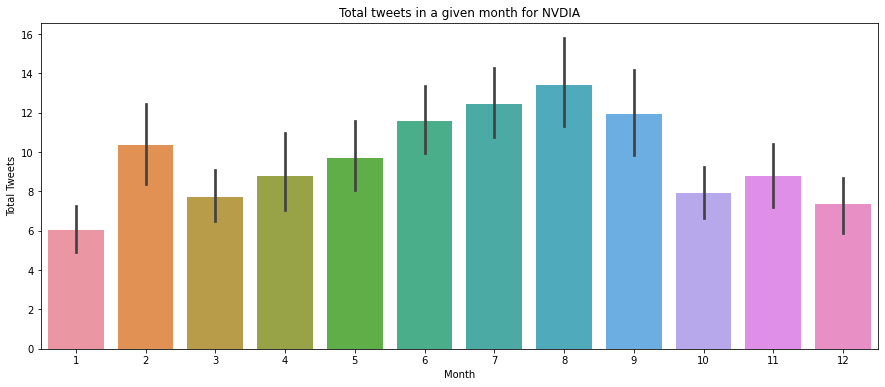

In [42]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

# Add title
plt.title("Total tweets in a given month for NVDIA")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data10['Month'], y=data10['Total Tweets'])

# Add label for vertical axis
plt.ylabel("Total Tweets")

plt.xlabel("Month")

In [86]:
data10.to_csv("F:/Technocolabs intern/final dataset 1/NVDIA_final.csv")